# Import StatsLibX

## pip install statslibx

In [21]:
import statslibx as slx
slx.welcome()

StatsLibx v0.1.8
Librería de estadística descriptiva e inferencial
Autor: Emmanuel Ascendra

Clases disponibles:
  - DescriptiveStats: Estadística descriptiva
  - InferentialStats: Estadística inferencial
  - UtilsStats: Utilidades Extras
  - Datasets: Carga de Datasets
  - Preprocessing: Preprocesamiento de datos

Para más información: help(statslibx)


## Imports

In [22]:
import statslibx as slx
from statslibx.datasets import load_dataset
from statslibx.preprocessing import Preprocessing
from statslibx import DescriptiveStats, InferentialStats, UtilsStats

## StatsLibX. datasets

In [1]:
from statslibx.datasets import load_dataset

In [2]:
load_dataset("iris.csv") # Import a dataset from the package

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
X, y = load_dataset(
        name="iris.csv", 
        return_X_y=(["sepal_length", "sepal_width"], "petal_width")
        )

# Show first 5 elements for Machine Learning 
print("Array X: ",X[0:5])
print("Array y: ",y[0:5])

Array X:  [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]
Array y:  [0.2 0.2 0.2 0.2 0.2]


In [4]:
# For simplyfication
from statslibx.datasets import load_iris, load_penguins
iris = load_iris()
penguins = load_penguins()
print("Iris: \n", iris.head())
print("Penguins: \n", penguins.head())


Iris: 
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
Penguins: 
   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


In [5]:
# from statslibx.datasets import generate_dataset
from statslibx.datasets import generate_dataset

df1 = generate_dataset(
    n_rows=1000,
    schema={
        "age": {"dist": "normal", "mean": 30, "std": 5},
        "salary": {"dist": "normal", "mean": 1500, "std": 800},
        "score": {"dist": "uniform", "low": 0, "high": 100},
        "gender": {"dist": "categorical", "choices": ["M", "F"]}
    },
    seed=42
)
df2 = generate_dataset(
    n_rows=1000,
    schema={
        "age": {"dist": "normal", "mean": 30, "std": 5},
        "salary": {"dist": "normal", "mean": 1500, "std": 800},
        "score": {"dist": "uniform", "low": 0, "high": 100},
        "gender": {"dist": "categorical", "choices": ["M", "F"]}
    },
    seed=43
)

print(df1.head())
print(df2.head())

     age   salary  score gender
0  32.48  2619.48  40.71      M
1  29.31  2239.71   6.60      M
2  33.24  1547.70  34.88      F
3  37.62   982.45  11.10      F
4  28.83  2058.58  80.82      F
     age   salary  score gender
0  31.29  2139.29  21.33      M
1  25.46  1672.85  18.96      M
2  28.11  2299.85  79.92      M
3  27.33  2009.26  47.36      M
4  34.29  1383.57  89.09      F


In [12]:
schema = {
    "age": {
        "dist": "normal",
        "mean": 30,
        "std": 20,
        "type": "int"
    },
    "salary": {
        "dist": "normal",
        "mean": 1500,
        "std": 800,
        "type": "float"
    },
    "events": {
        "dist": "categorical",
        "choices": ["low", "medium", "high"],
        "type": "int"
    }
}
df = generate_dataset(
    n_rows=1000,
    schema=schema,
    seed=42,
    save=False,
    filename="Dataset_nuevo"
)
df

,age,salary,events
0,40,2619.48,medium
1,27,2239.71,high
2,43,1547.70,medium
3,60,982.45,high
4,25,2058.58,high
...,...,...,...
995,24,2356.12,high
996,66,1478.78,medium
997,43,794.50,low
998,19,1369.55,high


## StatsLibX. preprocessing

In [27]:
from statslibx.preprocessing import Preprocessing
from statslibx.datasets import load_iris

In [28]:
# For work with this package, we will use penguins dataset
df = load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [29]:
# Create a preprocessing object
preprocessing = Preprocessing(df)

In [30]:
# Detect nulls
preprocessing.detect_nulls()

,column,nulls,non_nulls,null_pct
0,species,0,344,0.000000
1,island,0,344,0.000000
2,bill_length_mm,2,342,0.005814
3,bill_depth_mm,2,342,0.005814
4,flipper_length_mm,2,342,0.005814
5,body_mass_g,2,342,0.005814
6,sex,11,333,0.031977


In [31]:
# Detect uniqueness
preprocessing.check_uniqueness()

,column,unique_values
0,species,3
1,island,3
2,bill_length_mm,164
3,bill_depth_mm,80
4,flipper_length_mm,55
5,body_mass_g,94
6,sex,2


In [32]:
# Preview data
preprocessing.preview_data()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [33]:
# Describe numeric
preprocessing.describe_numeric()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [34]:
# Describe categorical
preprocessing.describe_categorical()

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,MALE
freq,152,168,168


In [35]:
# Fill nulls
preprocessing.fill_nulls(
                fill_with=0,
                columns=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"] 
            )
preprocessing.preview_data()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,0.0,0.0,0.0,0.0,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [36]:
# Create a preprocessing object again
df = load_penguins()
preprocessing = Preprocessing(df)

In [37]:
# Normalize
preprocessing.normalize(
                column=[    
                    "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
            )
preprocessing.preview_data()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.254545,0.666667,0.152542,0.291667,MALE
1,Adelie,Torgersen,0.269091,0.511905,0.237288,0.305556,FEMALE
2,Adelie,Torgersen,0.298182,0.583333,0.389831,0.152778,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,0.167273,0.738095,0.355932,0.208333,FEMALE


In [38]:
# Create a preprocessing object again
df = load_penguins()
preprocessing = Preprocessing(df)

In [39]:
# Standarize
preprocessing.standardize(
                column=[    
                    "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
            )
preprocessing.preview_data()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.883205,0.784300,-1.416272,-0.563317,MALE
1,Adelie,Torgersen,-0.809939,0.126003,-1.060696,-0.500969,FEMALE
2,Adelie,Torgersen,-0.663408,0.429833,-0.420660,-1.186793,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,-1.322799,1.088129,-0.562890,-0.937403,FEMALE


In [40]:
# Create a preprocessing object again
df = load_penguins()
preprocessing = Preprocessing(df)

In [41]:
# Filter rows
condition = (preprocessing.data["species"] == "Adelie") & (preprocessing.data["bill_length_mm"] > 40)
preprocessing.filter_rows(condition=condition)
preprocessing.preview_data()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
17,Adelie,Torgersen,42.5,20.7,197.0,4500.0,MALE
19,Adelie,Torgersen,46.0,21.5,194.0,4200.0,MALE


In [42]:
# Filter columns
preprocessing.filter_columns(columns=["species", "bill_length_mm", "bill_depth_mm"])
preprocessing.preview_data()

,species,bill_length_mm,bill_depth_mm
2,Adelie,40.3,18.0
9,Adelie,42.0,20.2
12,Adelie,41.1,17.6
17,Adelie,42.5,20.7
19,Adelie,46.0,21.5


In [43]:
# Rename columns
preprocessing.rename_columns(mapping={"bill_length_mm": "bill_length"})
preprocessing.preview_data()

,species,bill_length,bill_depth_mm
2,Adelie,40.3,18.0
9,Adelie,42.0,20.2
12,Adelie,41.1,17.6
17,Adelie,42.5,20.7
19,Adelie,46.0,21.5


In [44]:
# Create a preprocessing object again
df = load_penguins()
preprocessing = Preprocessing(df)
preprocessing.preview_data()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [45]:
# Detect Outliers
preprocessing.detect_outliers(column="body_mass_g")

No outliers found in column 'body_mass_g'


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


In [46]:
# Data Quality
preprocessing.data_quality()

,column,dtype,nulls,null_pct,unique_values,completeness_pct
0,species,object,0,0.000000,3,1.000000
1,island,object,0,0.000000,3,1.000000
2,bill_length_mm,float64,2,0.005814,164,0.994186
3,bill_depth_mm,float64,2,0.005814,80,0.994186
4,flipper_length_mm,float64,2,0.005814,55,0.994186
5,body_mass_g,float64,2,0.005814,94,0.994186
6,sex,object,11,0.031977,2,0.968023


## StatsLibX. Descriptive

In [47]:
from statslibx import DescriptiveStats

In [48]:
df = load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [49]:
# Create a DescriptiveStats object
ds = DescriptiveStats(df)

In [50]:
# Calculate mean, median, mode, variance, std, skewness, kurtosis, quantiles 
print("Mean: \n", ds.mean())
print("-"*40)
print("Median: \n", ds.median())
print("-"*40)
print("Mode: \n", ds.mode())
print("-"*40)
print("Variance: \n", ds.variance())
print("-"*40)
print("Standard Deviation: \n", ds.std())
print("-"*40)
print("Skewness: \n", ds.skewness())
print("-"*40)
print("Kurtosis: \n", ds.kurtosis())
print("-"*40)
print("Quantiles: \n", ds.quantile(q=[0.25, 0.5, 0.75]))

Mean: 
 bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64
----------------------------------------
Median: 
 bill_length_mm         44.45
bill_depth_mm          17.30
flipper_length_mm     197.00
body_mass_g          4050.00
dtype: float64
----------------------------------------
Mode: 
 bill_length_mm         41.1
bill_depth_mm          17.0
flipper_length_mm     190.0
body_mass_g          3800.0
Name: 0, dtype: float64
----------------------------------------
Variance: 
 bill_length_mm           29.807054
bill_depth_mm             3.899808
flipper_length_mm       197.731792
body_mass_g          643131.077327
dtype: float64
----------------------------------------
Standard Deviation: 
 bill_length_mm         5.459584
bill_depth_mm          1.974793
flipper_length_mm     14.061714
body_mass_g          801.954536
dtype: float64
----------------------------------------
Skewness: 
 bill_length

In [51]:
# Outliers
# Default Threshold = 1.5
# Just for this example we will set the threshold to 0.1
outliers = ds.outliers(column="body_mass_g", threshold=0.1)
print("Outliers: ", outliers.sum())

Outliers:  137


In [52]:
# Correlation
ds.correlation()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [53]:
# Covarianza
ds.covariance()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,29.807054,-2.534234,50.375765,2605.591912
bill_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


In [54]:
# Summary
ds.summary()

                                 RESUMEN DE ESTADÍSTICA DESCRIPTIVA                                 
Fecha: 2026-01-19 11:49:38
Variables analizadas: 4
----------------------------------------------------------------------------------------------------

                                      VARIABLE: bill_length_mm                                      
----------------------------------------------------------------------------------------------------

Medidas de Tendencia Central:
  Conteo                                                  342
  Media                                             43.921930
  Mediana                                           44.450000
  Moda                                              41.100000

Medidas de Dispersión:
  Desviación Estándar                                5.459584
  Varianza                                          29.807054
  Rango Intercuartílico (IQR)                        9.275000

Cuartiles y Rango:
  Mínimo                           

In [55]:
# Format Summary
ds.summary().to_dataframe(
                format="wide" # 'wide', 'long', 'compact'
                )

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
median,44.450000,17.300000,197.000000,4050.000000
mode,41.100000,17.000000,190.000000,3800.000000
std,5.459584,1.974793,14.061714,801.954536
variance,29.807054,3.899808,197.731792,643131.077327
iqr,9.275000,3.100000,23.000000,1200.000000
min,32.100000,13.100000,172.000000,2700.000000
q1,39.225000,15.600000,190.000000,3550.000000
q3,48.500000,18.700000,213.000000,4750.000000


In [56]:
# Format Summary
ds.summary().to_dataframe(
                format="long" # 'wide', 'long', 'compact'
                )

,Variable,Estadistica,Valor
0,bill_length_mm,count,342.000000
1,bill_length_mm,mean,43.921930
2,bill_length_mm,median,44.450000
3,bill_length_mm,mode,41.100000
4,bill_length_mm,std,5.459584
5,bill_length_mm,variance,29.807054
6,bill_length_mm,min,32.100000
7,bill_length_mm,q1,39.225000
8,bill_length_mm,q3,48.500000
9,bill_length_mm,max,59.600000


In [57]:
# Format Summary
ds.summary().to_dataframe(
                format="compact" # 'wide', 'long', 'compact'
                )

,count,mean,median,mode,std,variance,iqr,min,q1,q3,max,skewness,kurtosis
Variable,,,,,,,,,,,,,
bill_length_mm,342,43.921930,44.45,41.1,5.459584,29.807054,9.275,32.1,39.225,48.5,59.6,0.053118,-0.876027
bill_depth_mm,342,17.151170,17.30,17.0,1.974793,3.899808,3.100,13.1,15.600,18.7,21.5,-0.143465,-0.906866
flipper_length_mm,342,200.915205,197.00,190.0,14.061714,197.731792,23.000,172.0,190.000,213.0,231.0,0.345682,-0.984273
body_mass_g,342,4201.754386,4050.00,3800.0,801.954536,643131.077327,1200.000,2700.0,3550.000,4750.0,6300.0,0.470329,-0.719222


In [58]:
# Format Summary
ds.summary().to_styled_df()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.0000,342.0000,342.0000,342.0000
mean,43.9219,17.1512,200.9152,4201.7544
median,44.4500,17.3000,197.0000,4050.0000
mode,41.1000,17.0000,190.0000,3800.0000
std,5.4596,1.9748,14.0617,801.9545
variance,29.8071,3.8998,197.7318,643131.0773
iqr,9.2750,3.1000,23.0000,1200.0000
min,32.1000,13.1000,172.0000,2700.0000
q1,39.2250,15.6000,190.0000,3550.0000
q3,48.5000,18.7000,213.0000,4750.0000


In [59]:
# Format Summary
ds.summary().to_categorical_summary()

{'Tendencia Central':         bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
 count        342.00000      342.00000         342.000000   342.000000
 mean          43.92193       17.15117         200.915205  4201.754386
 median        44.45000       17.30000         197.000000  4050.000000
 mode          41.10000       17.00000         190.000000  3800.000000,
 'Dispersión':           bill_length_mm  bill_depth_mm  flipper_length_mm    body_mass_g
 std             5.459584       1.974793          14.061714     801.954536
 variance       29.807054       3.899808         197.731792  643131.077327
 iqr             9.275000       3.100000          23.000000    1200.000000,
 'Cuartiles':      bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
 min          32.100           13.1              172.0       2700.0
 q1           39.225           15.6              190.0       3550.0
 q3           48.500           18.7              213.0       4750.0
 max          59.600   

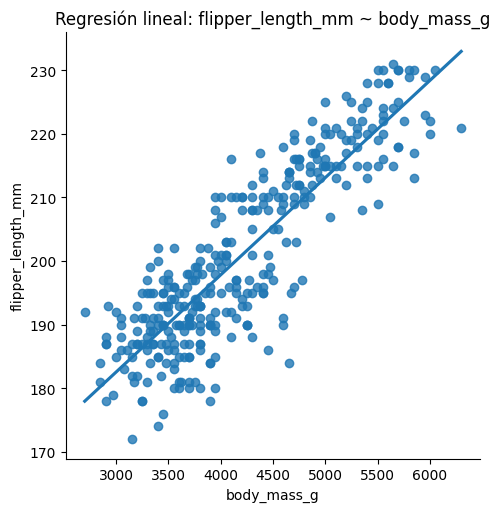

                                   RESULTADOS DE REGRESIÓN LINEAL                                   
Variable Dependiente: flipper_length_mm
Variables Independientes: body_mass_g
Motor: statsmodels
Fecha: 2026-01-19 11:49:41
----------------------------------------------------------------------------------------------------

INFORMACIÓN DEL MODELO:
----------------------------------------------------------------------------------------------------
Estadístico                                                       Valor
----------------------------------------------------------------------------------------------------
R-cuadrado                                                     0.758993
R-cuadrado Ajustado                                            0.758284
Estadístico F                                               1070.744592
Prob (F-estadístico)                                      4.370681e-107
AIC                                                         2295.035095
BIC            

In [60]:
# Linear Regression
ds = DescriptiveStats(load_penguins())
ds.linear_regression(
    X = "body_mass_g", 
    y = "flipper_length_mm",
    show_plot = True
    )

In [61]:
# If you need help
from statslibx.descriptive import DescriptiveStats as ds
from statslibx.datasets import load_penguins   
ds(load_penguins()).help()


╔════════════════════════════════════════════════════════════════════════════╗
║                    📊 CLASE DescriptiveStats - AYUDA COMPLETA              ║
╚════════════════════════════════════════════════════════════════════════════╝

📝 DESCRIPCIÓN:
   Clase para análisis estadístico descriptivo univariado y multivariado.
   Proporciona herramientas para análisis exploratorio de datos, medidas de
   tendencia central, dispersión, forma de distribución y regresión lineal.

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📋 MÉTODOS PRINCIPALES:

┌────────────────────────────────────────────────────────────────────────────┐
│ 1. 📊 ESTADÍSTICAS UNIVARIADAS                                             │
└────────────────────────────────────────────────────────────────────────────┘

  🔹 Medidas de Tendencia Central:
     • .mean(column=None)              → Media aritmética
     • .median(column=None)            → Mediana (valor central)
     • .mode(column=None) 

## StatsLibX. Inferential

In [20]:
from statslibx import InferentialStats
from statslibx.datasets import load_penguins

In [21]:
df = load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [22]:
# Create a InferentialStats Object
infer = InferentialStats(df)

In [23]:
# Confidence Interval + Point Estimate
infer.confidence_interval(
    column="bill_length_mm",
    statistic="mean"
)

(np.float64(43.34124734665466),
 np.float64(44.502612302468144),
 np.float64(43.9219298245614))

In [24]:
# t test 1 sample
# We use for this example 40 mm, you could prove with 44 :)
# Null Hypothesis:          mean < 40
# Alternative Hyphotesis:   mean > 40
infer.t_test_1sample(
    column="bill_length_mm",
    popmean=40,
    alternative="greater"
)
# With alternative, we configure 
# the alternative hypothesis

                         T-Test de Una Muestra (Media)                          
Fecha: 2026-01-19 12:21:33
Hipótesis Alternativa: greater
--------------------------------------------------------------------------------

RESULTADOS:
--------------------------------------------------------------------------------
Estadístico                                         13.284749
Valor p                                          4.791970e-33

INTERPRETACIÓN:
--------------------------------------------------------------------------------
Alpha = 0.05
❌ Se RECHAZA la hipótesis nula

PARÁMETROS:
--------------------------------------------------------------------------------
popmean                                                    40
sample_mean                                  43.9219298245614
n                                                         342
df                                                        341

In [25]:
# t test 2 sample
# Null Hyphothesis: Mean of both sample are equal
# Alternative Hyphothesis: Mean of both sample 
# are not equal
# Null Hyphothesis: Mean1 > Mean2
# Alternative Hyphothesis: Mean1 < Mean2

infer.t_test_2sample(
    column1="bill_length_mm",
    column2="bill_depth_mm",
    alternative="less"
)

                             T-Test de Dos Muestras                             
Fecha: 2026-01-19 12:21:33
Hipótesis Alternativa: less
--------------------------------------------------------------------------------

RESULTADOS:
--------------------------------------------------------------------------------
Estadístico                                         85.273599
Valor p                                          1.000000e+00

INTERPRETACIÓN:
--------------------------------------------------------------------------------
Alpha = 0.05
✔️ No hay evidencia suficiente para rechazar la hipótesis nula

PARÁMETROS:
--------------------------------------------------------------------------------
mean1                                        43.9219298245614
mean2                                      17.151169590643278
std1                                       5.4595837139265315
std2                                       1.9747931568167814
n1                                               

In [26]:
# t test paired
# u = mean difference
# Null Hyphothesis: u1 - u2 > 0
# Alternative Hyphothesis: u1 - u2 < 0

infer.t_test_paired(
    column1="bill_length_mm",
    column2="bill_depth_mm",
    alternative="less"
)

                                 T-Test Pareado                                 
Fecha: 2026-01-19 12:21:33
Hipótesis Alternativa: less
--------------------------------------------------------------------------------

RESULTADOS:
--------------------------------------------------------------------------------
Estadístico                                         79.505286
Valor p                                          1.000000e+00

INTERPRETACIÓN:
--------------------------------------------------------------------------------
Alpha = 0.05
✔️ No hay evidencia suficiente para rechazar la hipótesis nula

PARÁMETROS:
--------------------------------------------------------------------------------
mean_diff                                  26.770760233918125
n                                                         342

In [27]:
# Mann Whitney Test
# Null Hyphothesis: Values1 > Values2
# Alternative Hyphothesis: Values1 < Values2

infer.mann_whitney_test(
    column1="bill_length_mm",
    column2="bill_depth_mm",
    alternative="less"
)

                              Mann-Whitney U Test                               
Fecha: 2026-01-19 12:21:34
Hipótesis Alternativa: less
--------------------------------------------------------------------------------

RESULTADOS:
--------------------------------------------------------------------------------
Estadístico                                     116964.000000
Valor p                                          1.000000e+00

INTERPRETACIÓN:
--------------------------------------------------------------------------------
Alpha = 0.05
✔️ No hay evidencia suficiente para rechazar la hipótesis nula

PARÁMETROS:
--------------------------------------------------------------------------------
median1                                                 44.45
median2                                                  17.3
n1                                                        342
n2                                                        342

In [28]:
infer.data.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [29]:
# t test paired
# Null Hyphothesis: Values1 and Values2 are independent
# Alternative Hyphothesis: Values1 and Values2 are not independent
infer.chi_square_test(
    column1="bill_length_mm",
    column2="bill_depth_mm"
).interpretation


'Se RECHAZA la hipótesis alternativa'

In [30]:
# t test paired
# Null Hyphothesis: Values1 and Values2 are independent
# Alternative Hyphothesis: Values1 and Values2 are not independent
infer.chi_square_test(
    column1="flipper_length_mm",
    column2="body_mass_g"
).interpretation

'Se RECHAZA la hipótesis nula'

In [31]:
# Anova Test
# Null Hypothesis: All population means are equal
# Alternative Hypothesis: At least one average is different
infer.anova_oneway(
    column="bill_length_mm",
    groups="species"
)

                               ANOVA de Un Factor                               
Fecha: 2026-01-19 12:21:34
Hipótesis Alternativa: two-sided
--------------------------------------------------------------------------------

RESULTADOS:
--------------------------------------------------------------------------------
Estadístico                                        410.600255
Valor p                                          2.694614e-91

INTERPRETACIÓN:
--------------------------------------------------------------------------------
Alpha = 0.05
❌ Se RECHAZA la hipótesis nula

PARÁMETROS:
--------------------------------------------------------------------------------
groups                                                      3
n_total                                                   342

In [32]:
# Kruskal-Wallis Test
# Null Hypothesis: All groups come from the same distribution
# Alternative Hypothesis: At least one group differs
infer.kruskal_wallis_test(
    column="bill_length_mm",
    groups="species"
)

                              Kruskal-Wallis Test                               
Fecha: 2026-01-19 12:21:34
Hipótesis Alternativa: two-sided
--------------------------------------------------------------------------------

RESULTADOS:
--------------------------------------------------------------------------------
Estadístico                                        244.136718
Valor p                                          9.691372e-54

INTERPRETACIÓN:
--------------------------------------------------------------------------------
Alpha = 0.05
❌ Se RECHAZA la hipótesis nula

PARÁMETROS:
--------------------------------------------------------------------------------
groups                                                      3
n_total                                                   342

In [33]:
# Normality Test
# Null Hypothesis: Data are normal
# Alternative Hypothesis: Data are not normal
infer.normality_test(
    column="bill_length_mm",
    method="shapiro",
    test_statistic="mean"
)

                              Shapiro-Wilk (mean)                               
Fecha: 2026-01-19 12:21:34
Hipótesis Alternativa: two-sided
--------------------------------------------------------------------------------

RESULTADOS:
--------------------------------------------------------------------------------
Estadístico                                          0.974855
Valor p                                          1.119730e-05

INTERPRETACIÓN:
--------------------------------------------------------------------------------
Alpha = 0.05
❌ Se RECHAZA la hipótesis nula

PARÁMETROS:
--------------------------------------------------------------------------------
n                                                         342
test_statistic                                           mean
loc                                          43.9219298245614
scale                                      5.4595837139265315

In [34]:
# Hypothesis Test
# Null Hypothesis: Mean = popmean
# Alternative Hypothesis: Mean != popmean
# For this example, mean is 43.921929
infer.hypothesis_test(
    column1="bill_length_mm",
    method="mean",
    pop_mean=44
)

                               One-sample t-test                                
Fecha: 2026-01-19 12:21:34
Hipótesis Alternativa: two-sided
--------------------------------------------------------------------------------

RESULTADOS:
--------------------------------------------------------------------------------
Estadístico                                         -0.264447
Valor p                                          7.915952e-01

INTERPRETACIÓN:
--------------------------------------------------------------------------------
Alpha = 0.05
✔️ No hay evidencia suficiente para rechazar la hipótesis nula

In [35]:
# t test paired
# u = mean difference
# Null Hyphothesis: u1 - u2 = 0
# Alternative Hyphothesis: u1 - u2 != 0
infer.hypothesis_test(
    column1="bill_length_mm",
    column2="bill_depth_mm",
    method="difference_mean",
    homoscedasticity="levene"
)

                               Two-sample t-test                                
Fecha: 2026-01-19 12:21:34
Hipótesis Alternativa: two-sided
--------------------------------------------------------------------------------

RESULTADOS:
--------------------------------------------------------------------------------
Estadístico                                         85.273599
Valor p                                         5.194979e-271

INTERPRETACIÓN:
--------------------------------------------------------------------------------
Alpha = 0.05
❌ Se RECHAZA la hipótesis nula

TEST DE HOMOCEDASTICIDAD:
Método: levene
Estadístico: 348.858216
Valor p: 3.455934e-63

In [45]:
# Hypothesis Test
# Null Hypothesis: 50 % Poblacional Proportion is greater than 40
# Alternative Hypothesis: That proportion is different from 50 %
infer.hypothesis_test(
    column1="bill_length_mm",
    method="proportion",
    pop_proportion=(0.5, 40)
)

                               Proportion Z-test                                
Fecha: 2026-01-19 12:22:13
Hipótesis Alternativa: two-sided
--------------------------------------------------------------------------------

RESULTADOS:
--------------------------------------------------------------------------------
Estadístico                                       1606.024513
Valor p                                          0.000000e+00

INTERPRETACIÓN:
--------------------------------------------------------------------------------
Alpha = 0.05
❌ Se RECHAZA la hipótesis nula

In [37]:
# Hypothesis Test
# Null Hypothesis: Poblacional Proportion = popmean
# Alternative Hypothesis: Mean != popmean
infer.hypothesis_test(
    column1="bill_length_mm",
    column2="bill_depth_mm",
    method="variance"
)

                                Variance F-test                                 
Fecha: 2026-01-19 12:21:34
Hipótesis Alternativa: two-sided
--------------------------------------------------------------------------------

RESULTADOS:
--------------------------------------------------------------------------------
Estadístico                                          7.643211
Valor p                                          2.220446e-16

INTERPRETACIÓN:
--------------------------------------------------------------------------------
Alpha = 0.05
❌ Se RECHAZA la hipótesis nula

TEST DE HOMOCEDASTICIDAD:
Método: levene
Estadístico: 348.858216
Valor p: 3.455934e-63

In [38]:
# Normality Test
# Null Hypothesis: Variability
# Alternative Hypothesis: Data are not normal
infer.variance_test(
    column1="bill_length_mm",
    column2="bill_depth_mm"
)

                         Test de Levene (center=median)                         
Fecha: 2026-01-19 12:21:34
Hipótesis Alternativa: two-sided
--------------------------------------------------------------------------------

RESULTADOS:
--------------------------------------------------------------------------------
Estadístico                                        348.858216
Valor p                                          3.455934e-63

INTERPRETACIÓN:
--------------------------------------------------------------------------------
Alpha = 0.05
❌ Se RECHAZA la hipótesis nula

PARÁMETROS:
--------------------------------------------------------------------------------
var1                                       29.807054329371816
var2                                        3.899808012210389
n1                                                        342
n2                                                        342

In [46]:
# For help
infer.help()


╔════════════════════════════════════════════════════════════════════════════╗
║                   🔬 CLASE InferentialStats - AYUDA COMPLETA               ║
╚════════════════════════════════════════════════════════════════════════════╝

📝 DESCRIPCIÓN:
    Clase para estadística inferencial: pruebas de hipótesis, intervalos de
    confianza y pruebas de normalidad. Permite realizar inferencias sobre
    poblaciones a partir de muestras de datos.

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📋 MÉTODOS PRINCIPALES:

┌────────────────────────────────────────────────────────────────────────────┐
│ 1. 📊 INTERVALOS DE CONFIANZA                                              │
└────────────────────────────────────────────────────────────────────────────┘

    • .confidence_interval(column, confidence=0.95, statistic='mean')
    
    Calcula intervalos de confianza para diferentes estadísticos
    
        Parámetros:
            column      : Columna a analizar (s

## StatsLibX. Utils

In [1]:
from statslibx.datasets import load_penguins
from statslibx import UtilsStats

In [2]:
utils = UtilsStats()

In [3]:
# Upload data
df = utils.load_data(r"statslibx\datasets\penguins.csv")
df

✓ Datos cargados exitosamente desde: statslibx\datasets\penguins.csv
  Shape: (344, 7)
  Columnas: ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
# Validate Dataframe
utils.validate_dataframe(df)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [5]:
# Format number
utils.format_number(5.18639, 2)

'5.19'

In [6]:
# Check Normality
utils.check_normality(df, column="bill_length_mm")

{'is_normal': np.False_,
 'shapiro_statistic': np.float64(0.9748548096753171),
 'shapiro_pvalue': np.float64(1.1197299438900768e-05),
 'alpha': 0.05,
 'interpretation': 'No Normal'}

In [7]:
# Calculate confidence intervals
utils.calculate_confidence_intervals(df, column="bill_length_mm")

{'mean': np.float64(43.9219298245614),
 'std': np.float64(5.4595837139265315),
 'n': 342,
 'confidence_level': 0.95,
 'ci_lower': np.float64(43.34124734665466),
 'ci_upper': np.float64(44.502612302468144),
 'margin_error': np.float64(0.5806824779067415),
 'method': 'parametric'}

In [8]:
# Detect Outliers
utils.detect_outliers(df, column="bill_length_mm").sum()

np.int64(0)

In [9]:
# Calculate effect size
# 1️⃣ DataFrame + nombres de columna
utils.calculate_effect_size(data=df, group1="bill_length_mm", group2="bill_depth_mm")
# 2️⃣ Series directamente
utils.calculate_effect_size(group1=df["bill_length_mm"], group2=df["bill_depth_mm"])




{'effect_size': np.float64(6.521035110811925),
 'method': 'cohen',
 'interpretation': 'Grande',
 'mean_diff': np.float64(26.770760233918125),
 'pooled_std': np.float64(4.105293067588611)}

✓ Figura guardada: figures\distribucion_bill_length_mm.png


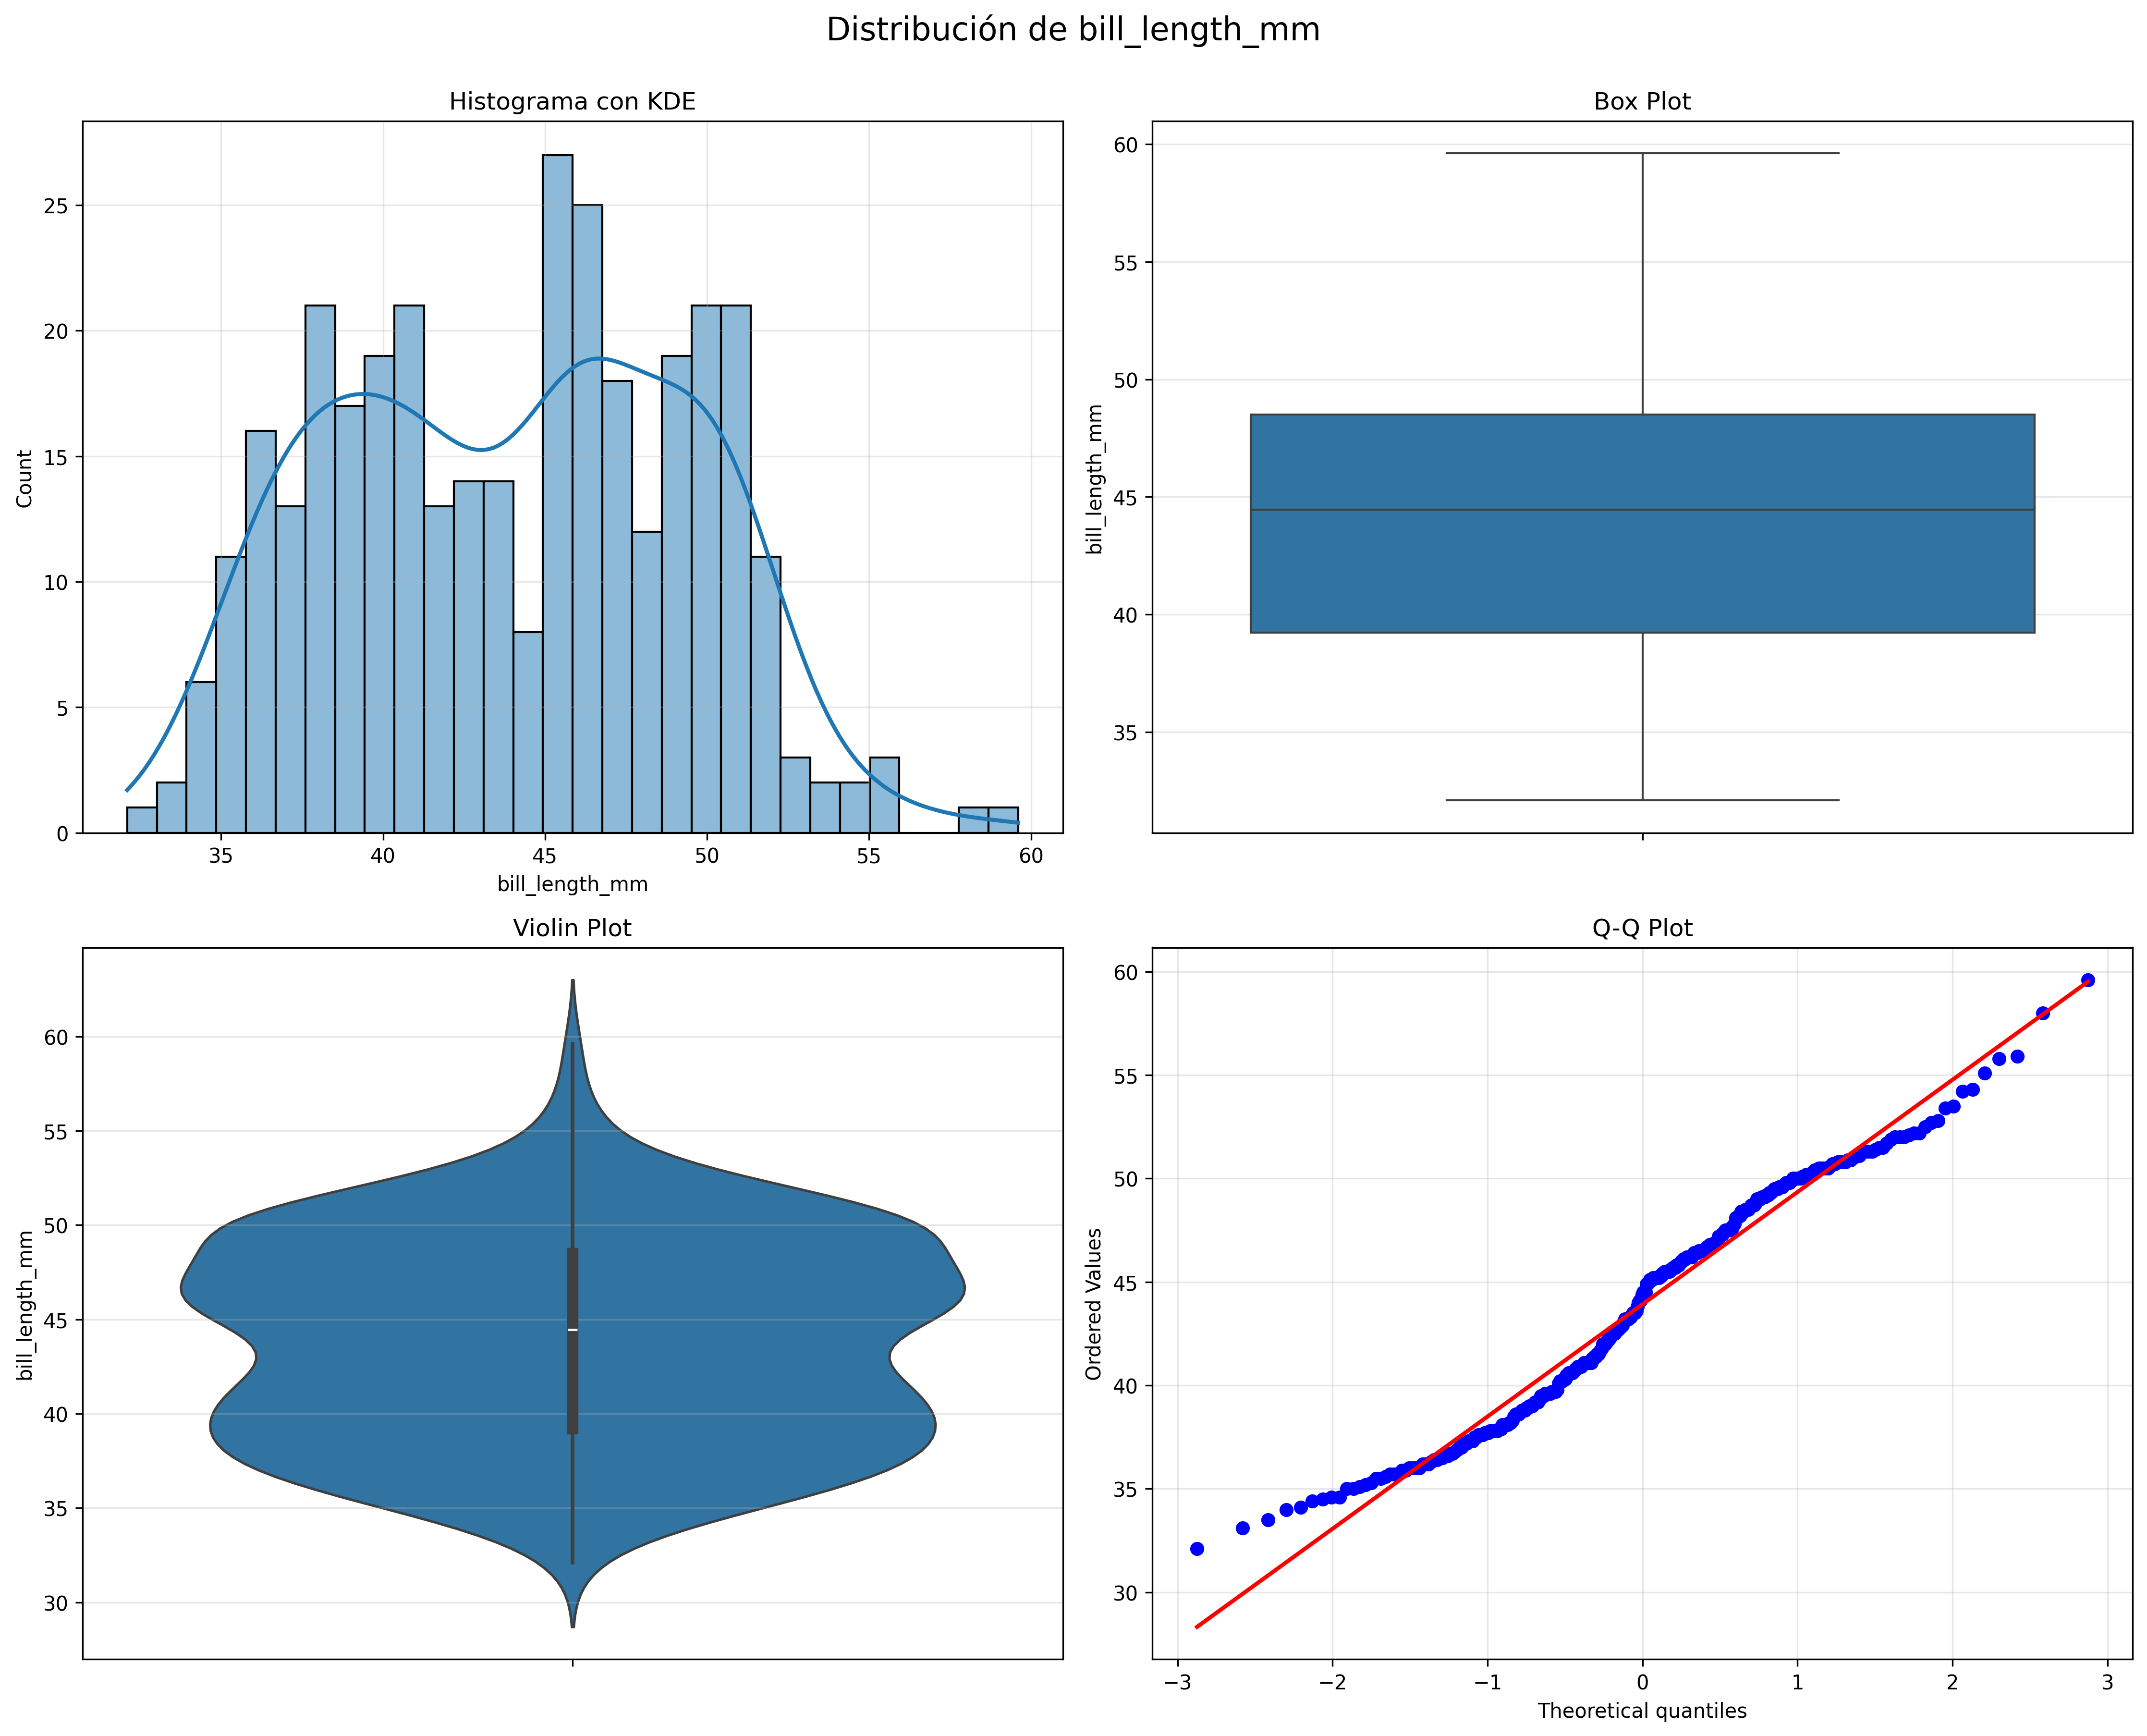

In [10]:
# Distribution Plot
utils.plot_distribution(df, column="bill_length_mm", backend="seaborn", bins=30, plot_type="all", save_fig=True)

In [11]:
import statslibx.descriptive as slx
slx.DescriptiveStats(df).correlation()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


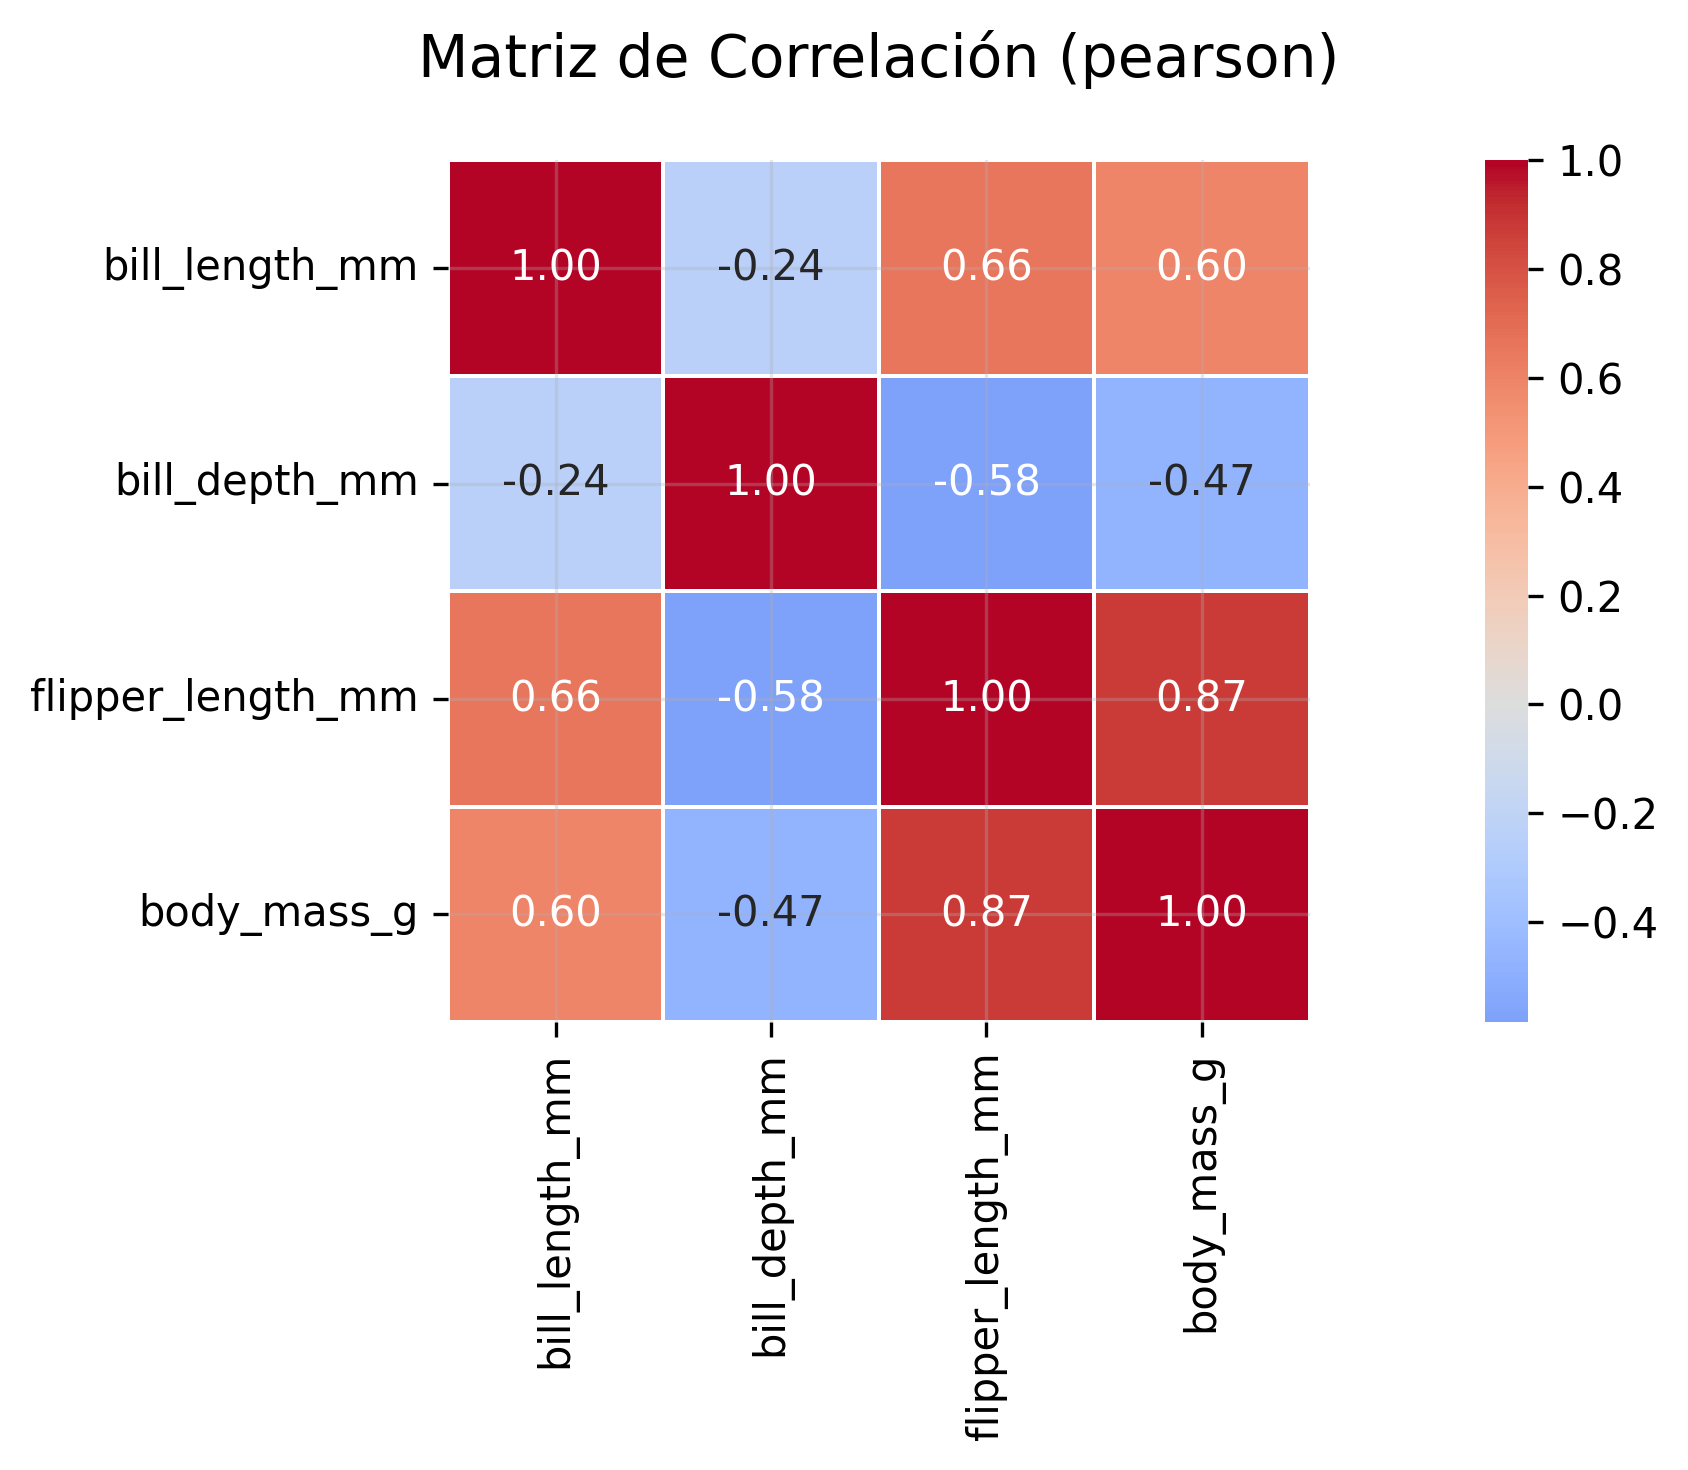

In [12]:
# Correlation Matrix
utils.plot_correlation_matrix(df, method="pearson")

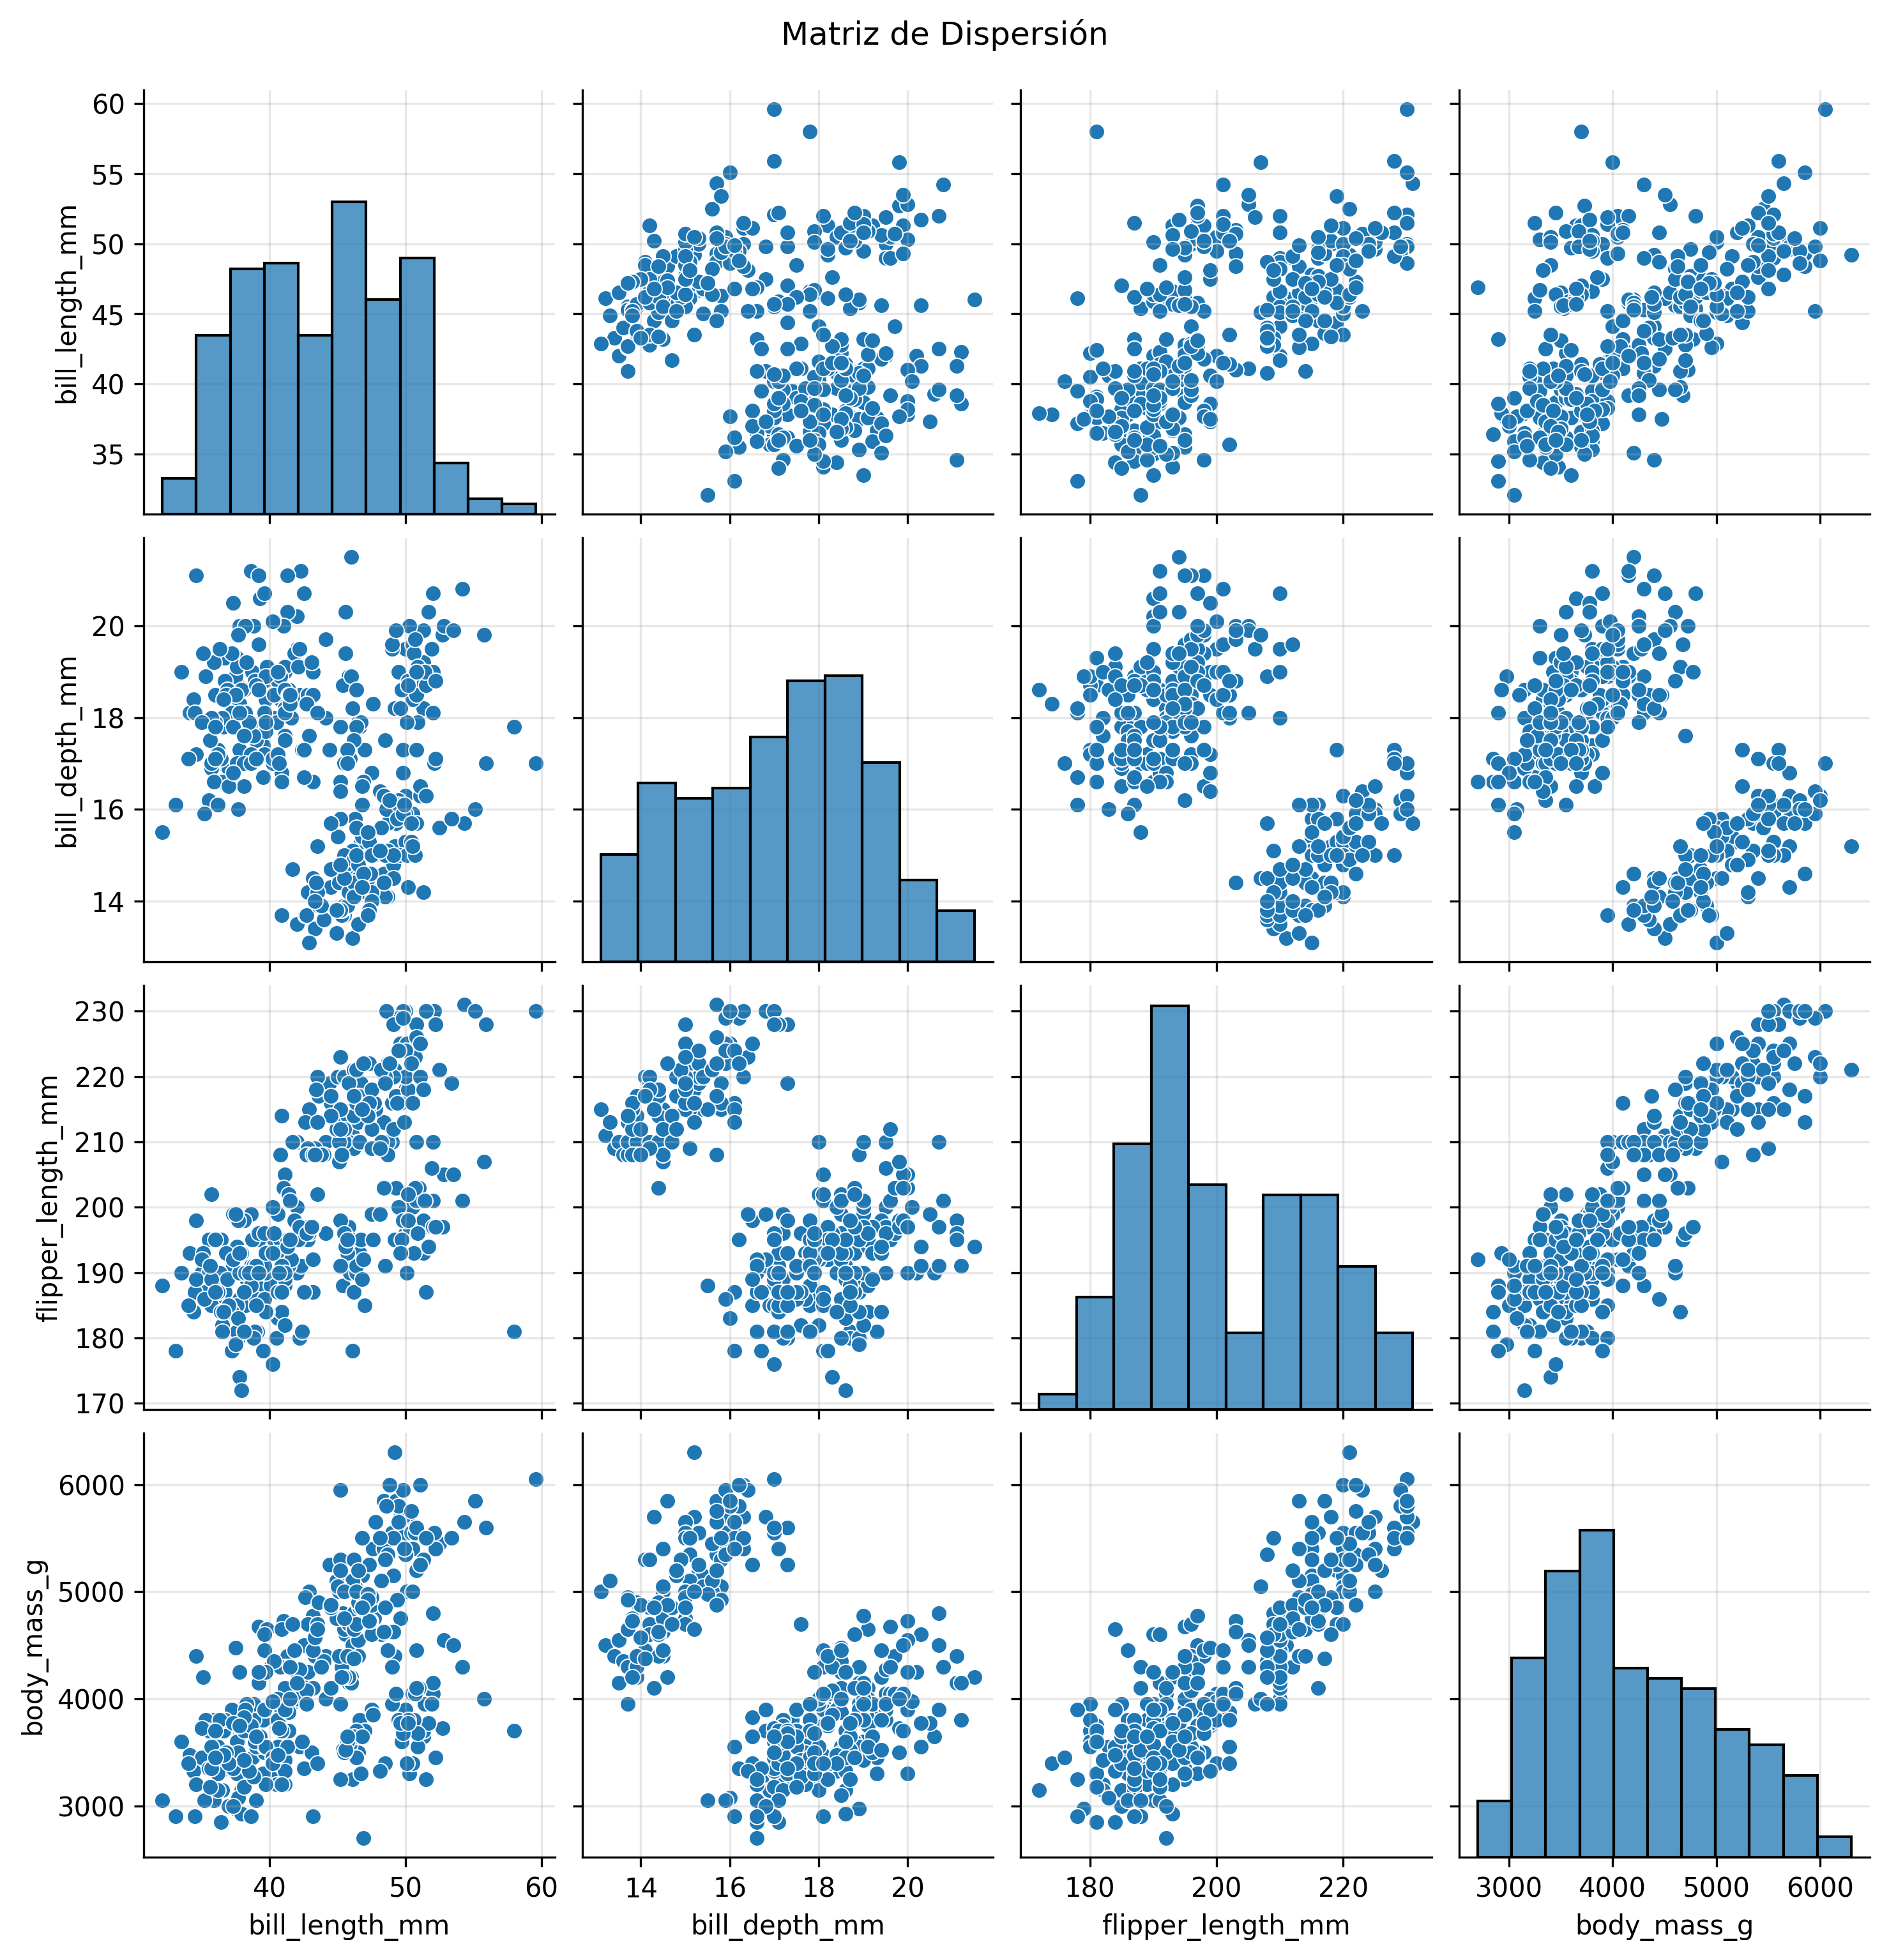

In [13]:
# Scatter Matrix
utils.plot_scatter_matrix(df)

In [14]:
from statslibx import InferentialStats as inf
inf(df).confidence_interval(column="bill_length_mm")

(np.float64(43.34124734665466),
 np.float64(44.502612302468144),
 np.float64(43.9219298245614))

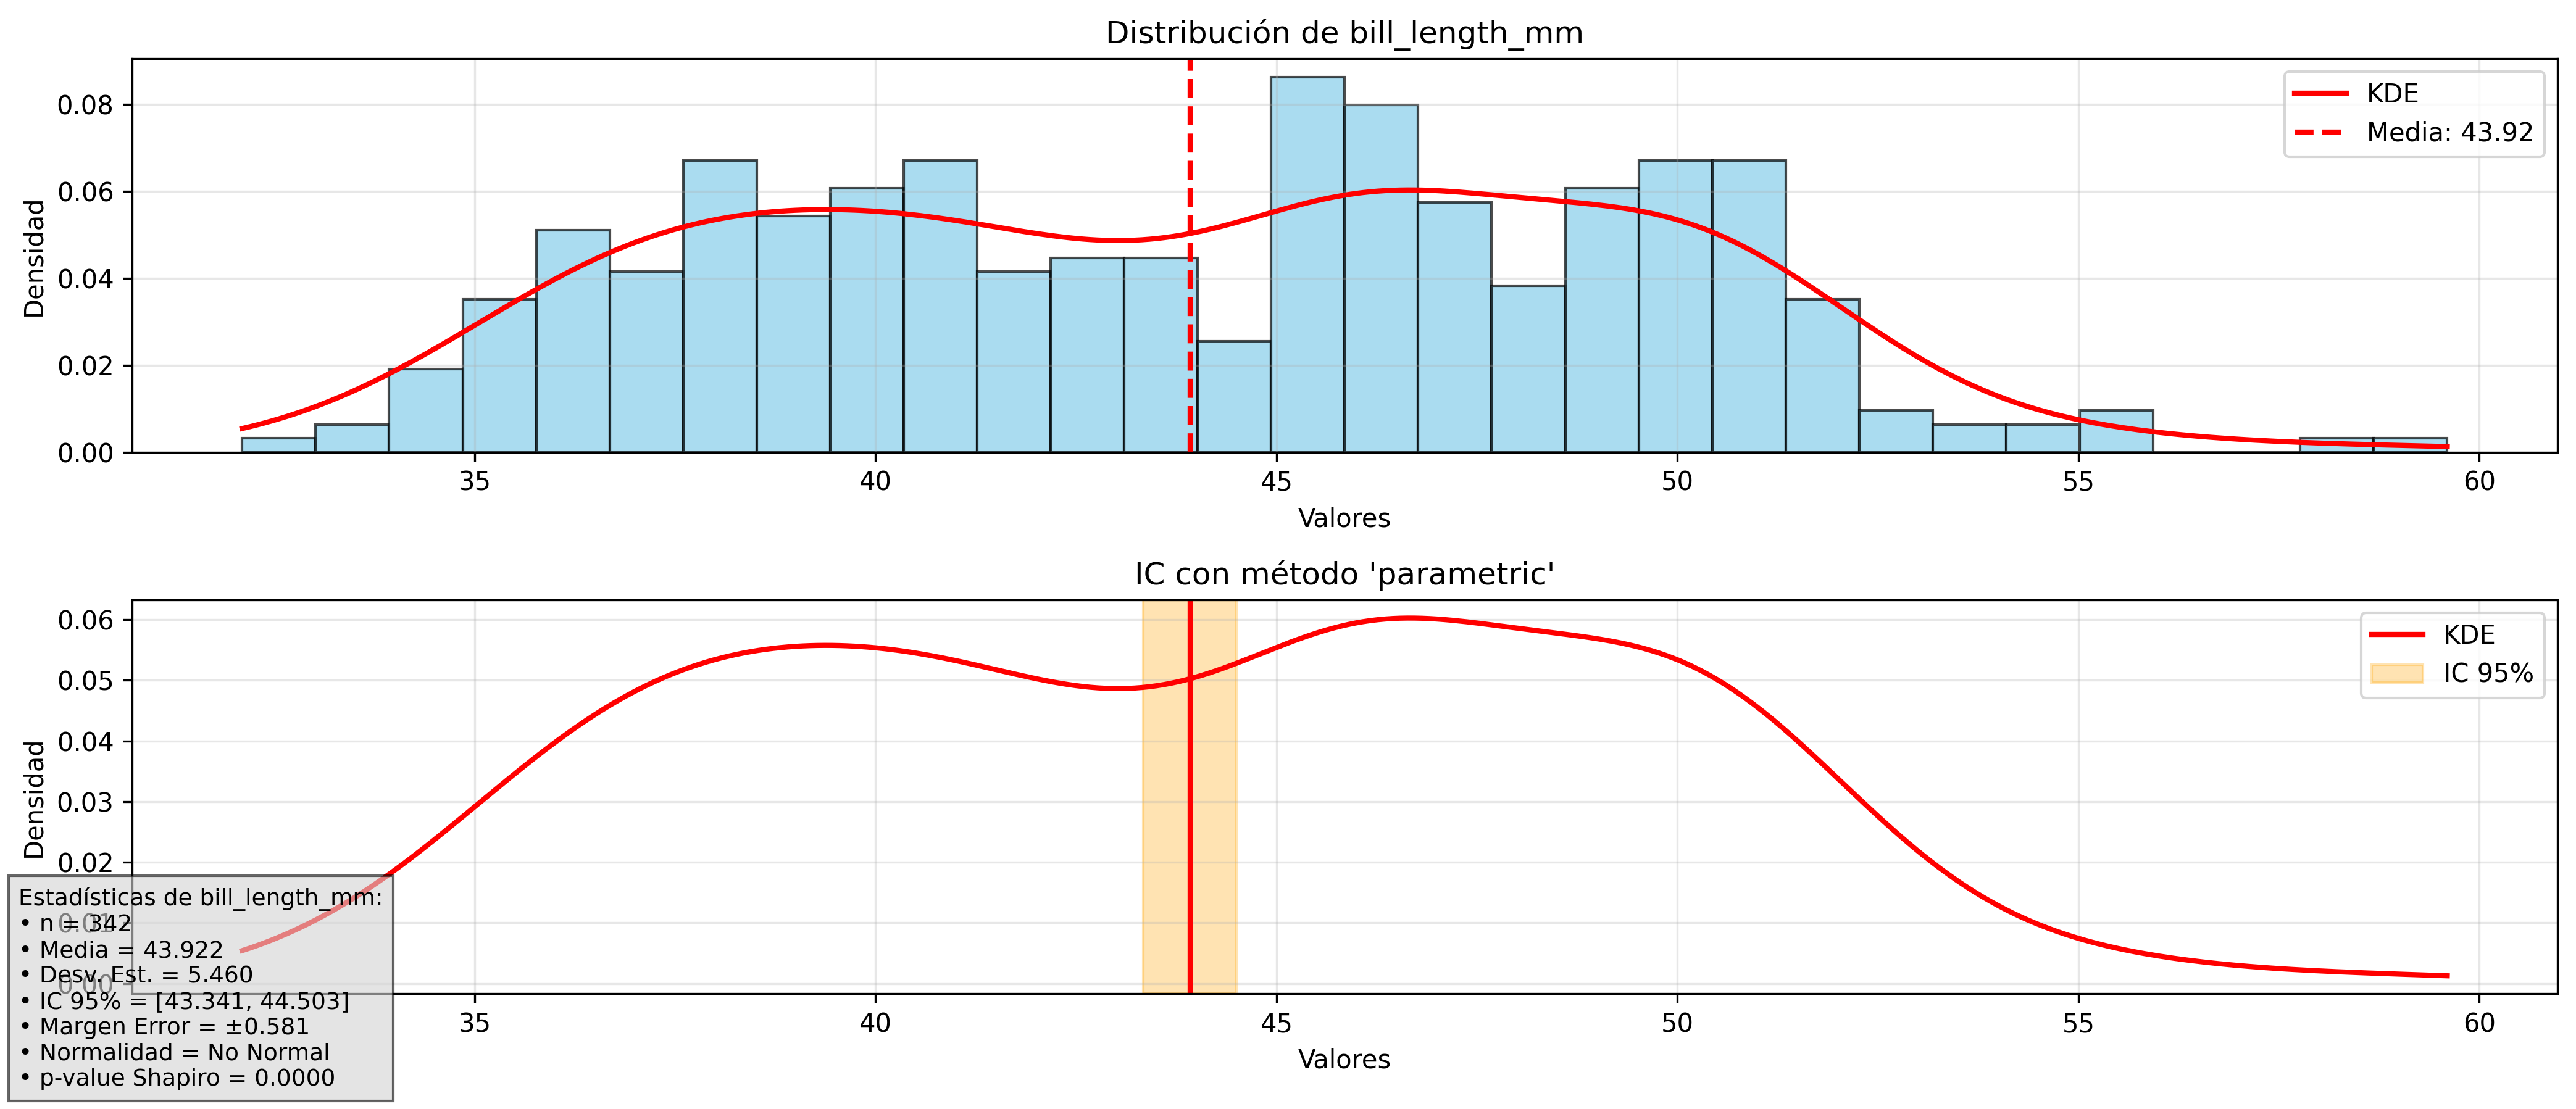

In [15]:
# Distribution With CI
utils.plot_distribution_with_ci(df, column="bill_length_mm")

In [16]:
# Multiple Distribution With CI
utils.get_descriptive_stats(df, column="bill_length_mm")

{'count': 342,
 'mean': np.float64(43.9219298245614),
 'median': np.float64(44.45),
 'mode': np.float64(41.1),
 'std': np.float64(5.4595837139265315),
 'variance': np.float64(29.807054329371816),
 'min': np.float64(32.1),
 'max': np.float64(59.6),
 'q1': np.float64(39.225),
 'q3': np.float64(48.5),
 'iqr': np.float64(9.274999999999999),
 'skewness': np.float64(0.05288480859327668),
 'kurtosis': np.float64(-0.880764584838206),
 'range': np.float64(27.5)}

In [17]:
utils.help()


╔════════════════════════════════════════════════════════════════════════════╗
║                    📊 CLASE UtilsStats - AYUDA COMPLETA                    ║
╚════════════════════════════════════════════════════════════════════════════╝

📝 DESCRIPCIÓN:
   Clase para análisis estadístico descriptivo univariado y multivariado.
   Proporciona herramientas para análisis exploratorio de datos, medidas de
   tendencia central, dispersión, forma de distribución y regresión lineal.

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📋 MÉTODOS PRINCIPALES:

┌────────────────────────────────────────────────────────────────────────────┐
│ 1. 📊 ANÁLISIS ESTADÍSTICO                                                 │
└────────────────────────────────────────────────────────────────────────────┘

  • .check_normality(data, alpha=0.05)
    Verifica normalidad usando test Shapiro-Wilk
    Retorna: dict con estadístico, p-value e interpretación

  • .calculate_confidence_interval